## In-class exercise 2: Solution
The dataset example_tweets.json is the json response returned from the Twitter API. This is a data collected using the keyword search surveillance - tweets that include this keyword are included in the dataset. On [this website](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet) you can find the documentation of the API and the columns it returns. In this challenge, you will explore this data and identify possible privacy and ethical issues with it.

#### Question 1
Use pandas to load this data into a dataframe.

In [1]:
#load the data
import pandas as pd
data = pd.read_json("example_tweets.json")

#### Question 2
Explore this dataset using the skills you have learned in the class. Make sure to check how the dataset looks like, what columns it has, what data type these columns have and if there are any missing values. Write a short description of the dataset and the remaining questions of this exercise.

In [2]:
data.dtypes

created_at                   datetime64[ns]
id                                    int64
id_str                                int64
full_text                            object
truncated                              bool
display_text_range                   object
entities                             object
metadata                             object
source                               object
in_reply_to_status_id               float64
in_reply_to_status_id_str           float64
in_reply_to_user_id                 float64
in_reply_to_user_id_str             float64
in_reply_to_screen_name              object
user                                 object
geo                                 float64
coordinates                         float64
place                                object
contributors                        float64
retweeted_status                     object
is_quote_status                        bool
quoted_status_id                    float64
quoted_status_id_str            

In [3]:
data.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'favorite_count', 'favorited', 'retweeted', 'lang', 'quoted_status',
       'possibly_sensitive', 'extended_entities', 'withheld_in_countries'],
      dtype='object')

In [4]:
data.isna().sum()

created_at                      0
id                              0
id_str                          0
full_text                       0
truncated                       0
display_text_range              0
entities                        0
metadata                        0
source                          0
in_reply_to_status_id         885
in_reply_to_status_id_str     885
in_reply_to_user_id           882
in_reply_to_user_id_str       882
in_reply_to_screen_name       882
user                            0
geo                          1000
coordinates                  1000
place                         994
contributors                 1000
retweeted_status              289
is_quote_status                 0
quoted_status_id              920
quoted_status_id_str          920
retweet_count                   0
favorite_count                  0
favorited                       0
retweeted                       0
lang                            0
quoted_status                 983
possibly_sensi

fter examining the dataset, I can conclude that it has 1000 rows with 32 columns, including created_at, id, etc. Some columns have many missing values (800+). However, the columns we are interested in can be worked with and are of the expected variable type.

#### Question 3
How many languages are the tweets in?

In [8]:
#how many languages question 
data["lang"].value_counts()
#English is the dominant language of the tweets, with tweets available in 13 languages. 

lang
en     832
fr     109
ca      25
nl      11
und      7
es       3
it       3
tl       2
in       2
de       2
ja       2
hi       1
th       1
Name: count, dtype: int64

#### Question 4
How many retweets did the tweets receive on average?

In [6]:
#average number of retweets 
print(f"On average, a tweet gets {data["retweet_count"].mean()} retweets")
#the mean rt count is 417,352

On average, a tweet gets 417.352 retweets


In [7]:
print(data["retweet_count"].mean())

417.352


#### Question 5
Is the retweets number higher or lower for tweets that contain sensitive links vs. the one's with non-sensitive and no links? Tip: check in the documentation what missing values in column possibly_sensitive mean and consider what you need to do with them.

In [10]:
#Here I replace all missing values in the column possibly_sensitive with 0
data["possibly_sensitive"].fillna(0, inplace=True)

/var/folders/j9/9v6cy4l50_1dhlx4d1h_hcv80000gn/T/ipykernel_21731/262076273.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["possibly_sensitive"].fillna(0, inplace=True)


I have checked the documentation and I can assume that a missing value in the column possibly_sensitive means that the tweet is not possibly sensitive (the authors did not fill this field in). I can hence fill in the missing values with 0. Note that this is an assumption!

In [11]:
#To get separate means for possibly sensitive and not sensitive tweets I use groupby. 
data.groupby(['possibly_sensitive'])['retweet_count'].mean()

possibly_sensitive
0.0    420.091919
1.0    146.100000
Name: retweet_count, dtype: float64

#### Question 6
Imagine that you want to research if there is a relation between the language of the tweets and number of retweets the tweets receive. Hence, you need the columns with information on the language of the tweet (lang) and its number of retweets (retweet_count).
 - Minimize the dataset accordingly. Explain your minimization steps.
 - What other steps would you need to take to make sure that the data follows privacy protection principles discussed in the lecture? Give concrete examples based on the information available in your minimized dataset. Tip: consider what identifiable and identified information the text and user columns contain.

In [26]:
# Only keep the columns you need
smaller_data = data[["retweet_count", "lang"]]
smaller_data.head()

,retweet_count,lang
0,100,en
1,298,en
2,1,en
3,0,en
4,0,fr


Note: If we were to share this data, we would have to be careful with the user and full_text columns since both can contain identifying information both for the poster and for other Twitter users which may or may not be in our dataset.

#### Question 7
Can you visualize the relationship between the language of a tweet and the number of times a tweet was retweeted? 

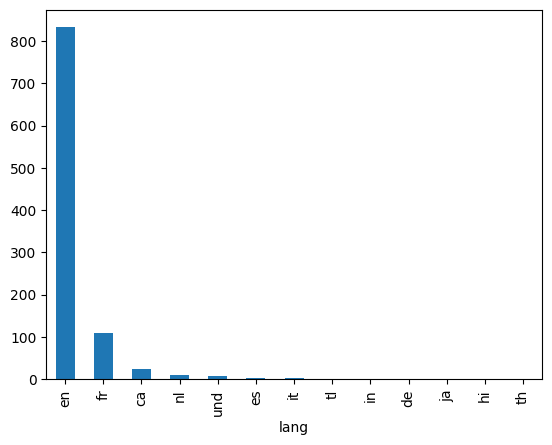

In [27]:
import matplotlib.pyplot as plt

data["lang"].value_counts().plot(kind="bar")
plt.show()